## Model_9
<p>In this notebook I am going to use LightGBM model</p>

In [1]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/train.csv")
data_2 = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/test.csv")

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.11,
    max_depth=3,
    verbose=0
    )
lgb_model.fit(X_train_scaled, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(learning_rate=0.11, max_depth=3, verbose=0)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lgb_model.predict(X_test_scaled)
print(f"MSE:---> {mean_squared_error(y_test, y_pred)}")
print(f"r2Score:---> {r2_score(y_test, y_pred)}")

MSE:---> 7.960169772407999
r2Score:---> 0.9115520797994104


/home/kenbaker-gif/global_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


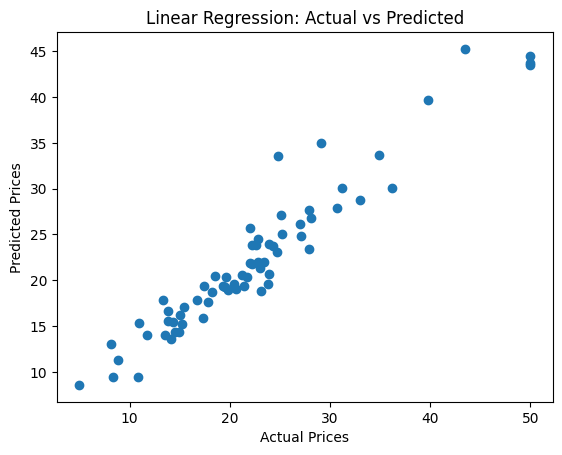

In [6]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()